1. Use PyTorch to train a logistic-classifier for the MNIST dataset of handwritten digits. Use the provided PyTorch DataSet and DataLoader to read from the earlier MNIST data files — mnist -traindata.hdf5 and mnist testdata.hdf5. Create a nn.Sequential network with a single fully-connected (i.e., linear) layer. Choose dimensions that match the multi-class classifier from Homework 4. Temporarily omit the final soft-max activation (PyTorch will implicitly compute this whien calculating the loss).

Train your model using a multi-category cross-entropy loss. PyTorch provides the CrossEntropyLoss to numerically stabilize the combined SoftMax-NLLikelihood computation. Optimize with (standard) stochastic gradient descent (SGD) and with a mini-batch size of 100. Experiment with l1- and/or l2-regularization to stabilize training and improve generalization. You may need to experiment the
learning rate to improve performance. Record the log-loss and accuracy of your model on the training set and test set at the end of each epoch. Plot log-loss (i.e., learning curve) of the training set and test set on the same figure. On
a separate figure plot the accuracy of your model on the training set and test set. Plot each as a function of the epoch number.
Evaluate the fully trained model on the test data and generate a “confusion matrix” – i.e., find the classification rate conditioned on the true class. Element (i, j) of the confusion matrix is the rate at which the network decides class j when class i is the correct label (ground truth). Use the seaborn
or like python package to generate a heatmap showing the confusion matrix.

In [ ]:
# Importing the necessary libraries.
import numpy as np
import torch
import torch.nn as nn # nn -> Neural Network.
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from hdf5_dataset import HDF5Dataset

In [ ]:
# Loading the training dataset.  
training_dataset = HDF5Dataset(file_path = f"mnist_traindata.hdf5", data_name = 'xdata', label_name = 'ydata')
testing_dataset = HDF5Dataset(file_path = f"mnist_testdata.hdf5", data_name = 'xdata', label_name = 'ydata')
# Loading the testing dataset.
trainingdataset_loader = torch.utils.data.DataLoader(training_dataset, batch_size = 100, shuffle = True) # Shuffling the training dataset.
testingdataset_loader = torch.utils.data.DataLoader(testing_dataset, batch_size = 100, shuffle = False)
# Loss function initialization.
loss_function = nn.CrossEntropyLoss()

**Standard SGD with no regularization**



In [ ]:
# Defining the first model:
model_1 = torch.nn.Sequential(nn.Linear(in_features = 28 * 28, out_features = 10))
# Defining the (standard) Stochastic Gradient Descent optimizer for model-1:
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr = 0.015) # Learning rate = 0.015
# Initializing the number of epochs and defining the lists for: loss during training & testing phase, accuracy during training & testing phase.
epochs = 50
training_loss = []
training_accuracy = []
testing_loss = []
testing_accuracy = []
# Looping over the epochs:
for num in range(epochs):
    correct_training = 0
    correct_testing = 0
    train_loss = 0
    test_loss = 0
    # Training the model:
    for images, labels in trainingdataset_loader:
        labels = torch.argmax(labels, dim = 1)
        input = images.view(-1, 28 * 28)
        # Forward propagation:
        output = model_1(input)
        loss = loss_function(output, labels) # Implementing the loss function.
        pred = torch.max(output, 1)[1] # Checking whether the model has correctly detected the images.
        correct_training += (pred == labels).sum().numpy()
        train_loss += loss.data # Storing the loss during the training phase.
        # Backward propagation:
        optimizer_1.zero_grad()
        loss.backward()
        optimizer_1.step()
    # Testing the model:
    for images, labels in testingdataset_loader:
        labels = torch.argmax(labels, dim = 1)
        input = images.view(-1, 28 * 28)
        # Forward propagation:
        output = model_1(input)
        loss = loss_function(output, labels) # Checking whether the model has correctly detected the images.
        pred = torch.max(output, 1)[1]
        correct_testing += (pred == labels).sum().numpy()
        test_loss += loss.data # Storing the loss during the testing phase.
    # Appending the final loss and accuracy during both the phases (training & testing):
    training_loss.append(train_loss / len(trainingdataset_loader.dataset))
    training_accuracy.append(correct_training / len(trainingdataset_loader.dataset)) 
    testing_loss.append(test_loss / len(testingdataset_loader.dataset))
    testing_accuracy.append(correct_testing / len(testingdataset_loader.dataset)) 
# Printing the accuracies:
print('Final accuracy during the training phase:' , training_accuracy[-1] * 100, '%') 
print('Final accuracy during the training phase:' , testing_accuracy[-1] * 100, '%')

Final accuracy during the training phase: 91.99166666666667 %
Final accuracy during the training phase: 92.17999999999999 %


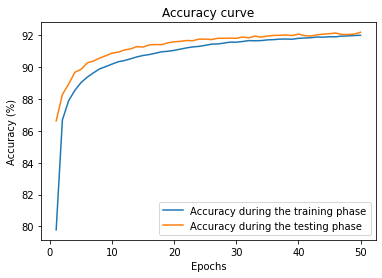

In [ ]:
# Plotting the accuracy graph:
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(range(1, epochs + 1), np.array(training_accuracy) * 100, label = "Accuracy during the training phase")
plt.plot(range(1, epochs + 1), np.array(testing_accuracy) * 100, label = "Accuracy during the testing phase")
plt.legend()
plt.show()

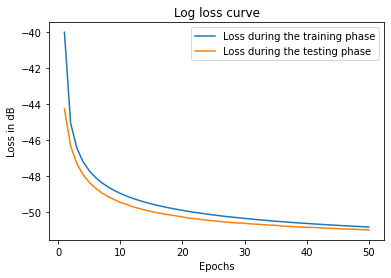

In [ ]:
# Plotting the loss graph:
plt.title("Log loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss in dB")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(training_loss)), label = "Loss during the training phase")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(testing_loss)), label = "Loss during the testing phase")
plt.legend()
plt.show()

**Standard SGD with L2 regularization**

In [ ]:
# Defining the second model:
model_2 = torch.nn.Sequential(nn.Linear(in_features = 28 * 28, out_features = 10))
# Defining the (standard) Stochastic Gradient Descent optimizer for model-2:
optimizer_2 = torch.optim.SGD(model_2.parameters(), lr = 0.1, weight_decay = 1e-3) # Learning rate = 0.1 & lambda = 10^(-3).
# Initializing the number of epochs and defining the lists for: loss during training & testing phase, accuracy during training & testing phase.
epochs = 50
training_loss = []
training_accuracy = []
testing_loss = []
testing_accuracy = []
# Looping over the epochs:
for num in range(epochs):
    correct_training = 0
    correct_testing = 0
    train_loss = 0
    test_loss = 0
    # Training the model:
    for images, labels in trainingdataset_loader:
        labels = torch.argmax(labels, dim = 1)
        input = images.view(-1, 28 * 28)
        # Forward propagation:
        outputs = model_2(input)
        loss = loss_function(outputs, labels) # Implementing the loss function.
        pred = torch.max(outputs, 1)[1] # Checking whether the model has correctly detected the images.
        correct_training += (pred == labels).sum().numpy()
        train_loss += loss.data # Storing the loss during the training phase.
        # Backward propagation:
        optimizer_2.zero_grad()
        loss.backward()
        optimizer_2.step()
    # Testing the model:
    for images, labels in testingdataset_loader:
        labels = torch.argmax(labels, dim = 1)
        input = images.view(-1, 28 * 28)
        # Forward propagation:
        outputs = model_2(input)
        loss = loss_function(outputs, labels) # Implementing the loss function.
        pred = torch.max(outputs, 1)[1] # Checking whether the model has correctly detected the images.
        correct_testing += (pred == labels).sum().numpy()
        test_loss += loss.data # Storing the loss during the testing phase.
    # Appending the final loss and accuracy during both the phases (training & testing):
    training_loss.append(train_loss / len(trainingdataset_loader.dataset))
    training_accuracy.append(correct_training / len(trainingdataset_loader.dataset))
    testing_loss.append(test_loss / len(testingdataset_loader.dataset))
    testing_accuracy.append(correct_testing / len(testingdataset_loader.dataset))
# Printing the accuracies:
print('Final accuracy during the training phase:' , training_accuracy[-1] * 100, '%') 
print('Final accuracy during the training phase:' , testing_accuracy[-1] * 100, '%')

Final accuracy during the training phase: 92.11666666666667 %
Final accuracy during the training phase: 92.17 %


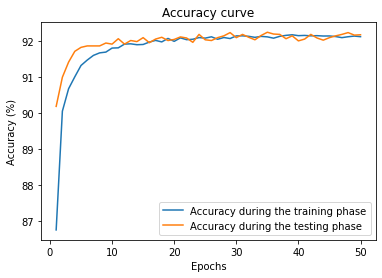

In [ ]:
# Plotting the accuracy graph:
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(range(1, epochs + 1), np.array(training_accuracy) * 100, label = "Accuracy during the training phase")
plt.plot(range(1, epochs + 1), np.array(testing_accuracy) * 100, label = "Accuracy during the testing phase")
plt.legend()
plt.show()

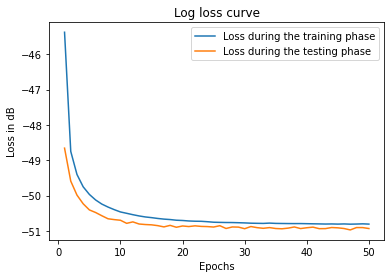

In [ ]:
# Plotting the loss graph:
plt.title("Log loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss in dB")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(training_loss)), label = "Loss during the training phase")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(testing_loss)), label = "Loss during the testing phase")
plt.legend()
plt.show()

**Confusion matrix (i.e., Heat map) for model-1 (standard SGD with no regularization)**

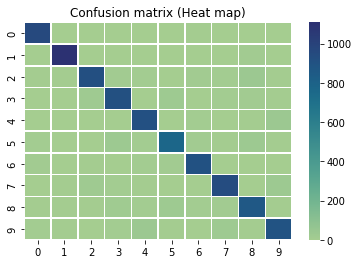

Most frequent miss-classifications: -
Actual number	Model prediction	Number of times the model has miss-classified
0 		 6 			 8
1 		 8 			 15
2 		 8 			 36
3 		 5 			 26
4 		 9 			 38
5 		 3 			 34
6 		 0 			 13
7 		 9 			 34
8 		 5 			 26
9 		 4 			 38


In [ ]:
# Initializing the confusion matrix: 
confusion_matrix = np.zeros([10, 10])

for images, labels in testingdataset_loader:
        labels = torch.argmax(labels, dim = 1)
        input = images.view(-1, 28 * 28)
        output = model_1(input)
        pred = torch.max(output, 1)[1]
        
        for j in range(100):
            confusion_matrix[labels[j]][pred[j]] += 1
# Plotting the confusion matrix:
heat = sns.heatmap(confusion_matrix, linewidth = 0.5, cmap = 'crest')  
plt.title("Confusion matrix (Heat map)")
plt.show()

for ele in range(10):
    confusion_matrix[ele][np.argmax(confusion_matrix[ele])] = 0

print('Most frequent miss-classifications: -')
print('Actual number\tModel prediction\tNumber of times the model has miss-classified')

for i in range(10):
    print(i, "\t\t", np.argmax(confusion_matrix[i]),"\t\t\t", int(confusion_matrix[i][np.argmax(confusion_matrix[i])]))

**Confusion matrix (i.e., Heat map) for model-2 (standard SGD with L2 regularization)**

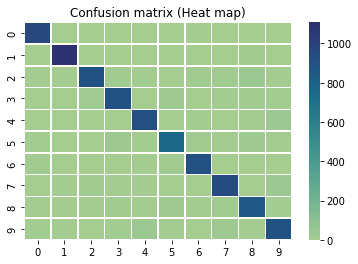

Most frequent miss-classifications: -
Actual number	Model prediction	Number of times the model has miss-classified
0 		 6 			 8
1 		 8 			 15
2 		 8 			 38
3 		 5 			 28
4 		 9 			 35
5 		 3 			 31
6 		 5 			 14
7 		 9 			 35
8 		 5 			 27
9 		 4 			 35


In [ ]:
# Initializing the confusion matrix: 
confusion_matrix = np.zeros([10, 10])

for images, labels in testingdataset_loader:
        labels = torch.argmax(labels, dim = 1)
        input = images.view(-1, 28 * 28)
        output = model_2(input)
        pred = torch.max(output, 1)[1]
        
        for j in range(100):
            confusion_matrix[labels[j]][pred[j]] += 1
# Plotting the confusion matrix:
heat = sns.heatmap(confusion_matrix, linewidth = 0.5, cmap = 'crest')  
plt.title("Confusion matrix (Heat map)")
plt.show()

for ele in range(10):
    confusion_matrix[ele][np.argmax(confusion_matrix[ele])] = 0

print('Most frequent miss-classifications: -')
print('Actual number\tModel prediction\tNumber of times the model has miss-classified')

for i in range(10):
    print(i, "\t\t", np.argmax(confusion_matrix[i]),"\t\t\t", int(confusion_matrix[i][np.argmax(confusion_matrix[i])]))